In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [10]:
import numpy as np

In [3]:
import forcelayout as fl

In [6]:
import sys
sys.path.append('../research/force-directed-layout-algorithms/examples/')

In [8]:
def load_file(name, dtype):
    with open(f'../research/force-directed-layout-algorithms/datasets/{name}', encoding='utf8') as data_file:
        return np.loadtxt(
            data_file,
            skiprows=1,
            delimiter=',',
            dtype=dtype,
            comments='#'
        )


def load_poker(size):
    return load_file(f'poker/poker{size}.csv', np.int16)


In [15]:
dataset = load_poker(10000)

In [16]:
X_train = dataset[:, :-1]
y_train = dataset[:, -1]

In [17]:
from openTSNE import TSNE, TSNEEmbedding, affinity, initialization
from openTSNE import initialization
from openTSNE.callbacks import ErrorLogger

In [18]:
opt_res_pca = []

tsne = TSNE(
    initialization="pca",
    n_jobs=8,
    # The embedding will be appended to the list we defined above, make sure we copy the
    # embedding, otherwise the same object reference will be stored for every iteration
    callbacks=lambda it, err, emb: opt_res_pca.append((it, err)),
    # This should be done on every iteration
    callbacks_every_iters=1,
)

In [19]:
%time embedding_pca = tsne.fit(X_train)

/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/numba-0.44.0-py3.7-linux-x86_64.egg/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/pynndescent-0.3.0-py3.7.egg/pynndescent/rp_trees.py", line 132:
<source missing, REPL/exec in use?>

  self.func_ir.loc))
/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/numba-0.44.0-py3.7-linux-x86_64.egg/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics f

CPU times: user 7min 50s, sys: 29.5 s, total: 8min 19s
Wall time: 1min 11s


In [20]:
emb_pca = embedding_pca

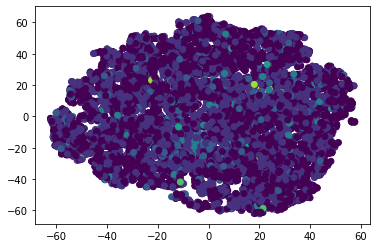

In [21]:
fig, ax = plt.subplots()
ax.scatter(emb_pca[:,0], emb_pca[:,1], c=y_train, rasterized=True)

In [23]:
opt_res_pca = np.array(opt_res_pca)

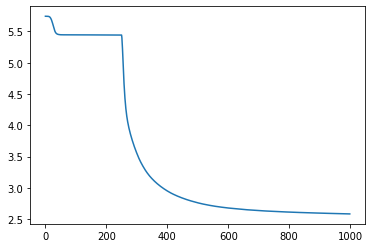

In [24]:
plt.plot(opt_res_pca[:,1])

In [25]:
X_train_all = dataset

In [27]:
opt_res_pca_all = []

tsne = TSNE(
    initialization="pca",
    n_jobs=8,
    # The embedding will be appended to the list we defined above, make sure we copy the
    # embedding, otherwise the same object reference will be stored for every iteration
    callbacks=lambda it, err, emb: opt_res_pca_all.append((it, err)),
    # This should be done on every iteration
    callbacks_every_iters=1,
)

In [28]:
%time embedding_pca_all = tsne.fit(X_train_all)

/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/numba-0.44.0-py3.7-linux-x86_64.egg/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/pynndescent-0.3.0-py3.7.egg/pynndescent/pynndescent_.py", line 37:
<source missing, REPL/exec in use?>

  self.func_ir.loc))
/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/numba-0.44.0-py3.7-linux-x86_64.egg/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostic

CPU times: user 8min 3s, sys: 30.1 s, total: 8min 33s
Wall time: 1min 11s


In [30]:
emb_pca_all = embedding_pca_all

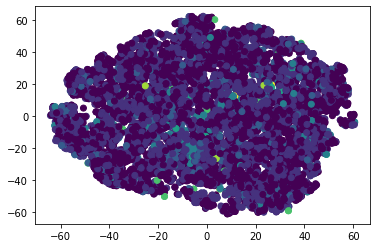

In [64]:
fig, ax = plt.subplots()
ax.scatter(emb_pca_all[:,0], emb_pca_all[:,1], c=y_train, rasterized=True)

In [69]:
import k_nn_classifier

In [70]:
k_nn_classifier.K_NN_classifier(emb_pca_all, y_train)

0.5816

In [65]:
fig.savefig('poker_10k_tsne.pdf')

In [23]:
opt_res_pca = np.array(opt_res_pca)

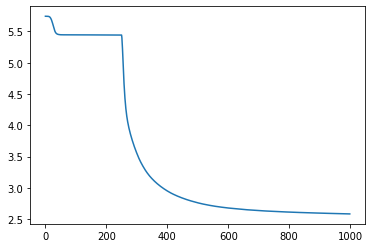

In [24]:
plt.plot(opt_res_pca[:,1])

In [45]:


def poker_distance(h1, h2):
    """
    similarity metric between two poker hands
    """
    ranks = range(0, 9, 2)
    suits = range(1, 10, 2)

    h1_ranks = h1[ranks]
    h2_ranks = h2[ranks]
    h1_ranks.sort()
    h2_ranks.sort()

    rank_diff = abs(sum(h2_ranks - h1_ranks)) / 75

    h1_suits = h1[suits]
    h2_suits = h2[suits]
    h1_suits.sort()
    h2_suits.sort()

    suit_diff = 1
    i = j = 0
    while i < 5 and j < 5:
        comp = h2_suits[j] - h1_suits[i]
        if comp == 0:
            suit_diff -= 0.2
            i += 1
            j += 1
        elif comp < 0:
            j += 1
        else:
            i += 1

    class_diff = abs(h1[10] - h2[10])
    return np.array([rank_diff, suit_diff, class_diff])


In [46]:
N0, N1 = 0, 2

h0 = X_train_all[N0]
h1 = X_train_all[N1]

In [47]:
poker_distance(h0, h1)

array([0.06666667, 0.8       , 1.        ])

In [61]:
rnd = np.random.randint(0, high=10000, size=5000).reshape(-1,2)
res = [poker_distance(X_train_all[i[0]], X_train_all[i[1]]) for i in rnd]
res = np.array(res)

Text(0.5, 1.0, 'class')

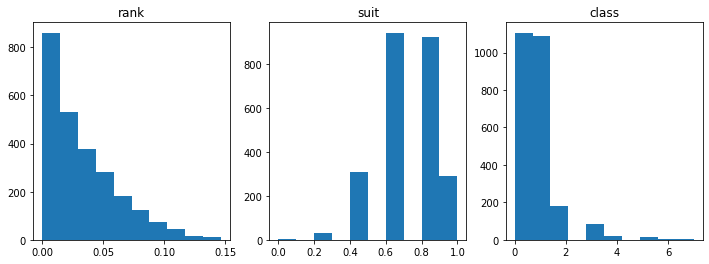

In [71]:
fig, ax = plt.subplots(1,3, figsize=(12,4))
ax[0].hist(res[:,0])
ax[0].set_title('rank')
ax[1].hist(res[:,1])
ax[1].set_title('suit')
ax[2].hist(res[:,2])
ax[2].set_title('class')

In [72]:
fig.savefig('poker_distance_sample_pdf.pdf')

In [74]:
import collections

cnt = collections.Counter(res[:,2])

In [83]:
cnt

Counter({2.0: 180,
         1.0: 1086,
         0.0: 1106,
         3.0: 83,
         5.0: 15,
         7.0: 3,
         4.0: 21,
         6.0: 6})